In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install language_tool_python

In [ ]:
# Import modules and setup notebook
%matplotlib inline
import sklearn
import numpy as np
import pandas as pd
import re

from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
plt.rcParams['figure.dpi']= 100

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from sklearn import metrics
from numpy import mean
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score,KFold
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.model_selection import validation_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve
from sklearn import ensemble, metrics
from sklearn.metrics import mean_absolute_error
import joblib
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt


from yellowbrick.regressor import ResidualsPlot
plt.style.use('seaborn-colorblind')

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_colwidth', 100)

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
pip install skll

In [ ]:
import numpy

def confusion_matrix(rater_a, rater_b,
    min_rating=None, max_rating=None):
    """
    Returns the confusion matrix between rater's ratings
    """
    assert(len(rater_a)==len(rater_b))
    if min_rating is None:
        min_rating = min(reduce(min, rater_a), reduce(min, rater_b))
    if max_rating is None:
        max_rating = max(reduce(max, rater_a), reduce(max, rater_b))
    num_ratings = max_rating - min_rating + 1
    conf_mat = [[0 for i in range(num_ratings)]
                for j in range(num_ratings)]
    for a,b in zip(rater_a,rater_b):
        conf_mat[a-min_rating][b-min_rating] += 1
    return conf_mat

def histogram(ratings, min_rating=None, max_rating=None):
    """
    Returns the counts of each type of rating that a rater made
    """
    if min_rating is None: min_rating = reduce(min, ratings)
    if max_rating is None: max_rating = reduce(max, ratings)
    num_ratings = max_rating - min_rating + 1
    hist_ratings = [0 for x in range(num_ratings)]
    for r in ratings:
        hist_ratings[r-min_rating] += 1
    return hist_ratings

def quadratic_weighted_kappa(rater_a, rater_b,
                             min_rating = None, max_rating = None):
    """
    Calculates the quadratic weighted kappa
    scoreQuadraticWeightedKappa calculates the quadratic weighted kappa
    value, which is a measure of inter-rater agreement between two raters
    that provide discrete numeric ratings.  Potential values range from -1  
    (representing complete disagreement) to 1 (representing complete
    agreement).  A kappa value of 0 is expected if all agreement is due to
    chance.
    
    scoreQuadraticWeightedKappa(rater_a, rater_b), where rater_a and rater_b
    each correspond to a list of integer ratings.  These lists must have the
    same length.
    
    The ratings should be integers, and it is assumed that they contain
    the complete range of possible ratings.
   
    score_quadratic_weighted_kappa(X, min_rating, max_rating), where min_rating
    is the minimum possible rating, and max_rating is the maximum possible
    rating
    """
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(reduce(min, rater_a), reduce(min, rater_b))
    if max_rating is None:
        max_rating = max(reduce(max, rater_a), reduce(max, rater_b))
    conf_mat = confusion_matrix(rater_a, rater_b,
                min_rating, max_rating)
    num_ratings = len(conf_mat)
    num_scored_items = float(len(rater_a))

    hist_rater_a = histogram(rater_a, min_rating, max_rating)
    hist_rater_b = histogram(rater_b, min_rating, max_rating)

    numerator = 0.0
    denominator = 0.0

    for i in range(num_ratings):
        for j in range(num_ratings):
            expected_count = (hist_rater_a[i]*hist_rater_b[j]
                    / num_scored_items) 
            d = pow(i-j,2.0) / pow(num_ratings-1, 2.0)
            numerator += d*conf_mat[i][j] / num_scored_items
            denominator += d*expected_count / num_scored_items

    return 1.0 - numerator / denominator

def linear_weighted_kappa(rater_a, rater_b,
                             min_rating = None, max_rating = None):
    """
    Calculates the linear weighted kappa
    linear_weighted_kappa calculates the linear weighted kappa
    value, which is a measure of inter-rater agreement between two raters
    that provide discrete numeric ratings.  Potential values range from -1  
    (representing complete disagreement) to 1 (representing complete
    agreement).  A kappa value of 0 is expected if all agreement is due to
    chance.
    
    linear_weighted_kappa(rater_a, rater_b), where rater_a and rater_b
    each correspond to a list of integer ratings.  These lists must have the
    same length.
    
    The ratings should be integers, and it is assumed that they contain
    the complete range of possible ratings.
   
    linear_weighted_kappa(X, min_rating, max_rating), where min_rating
    is the minimum possible rating, and max_rating is the maximum possible
    rating
    """
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(reduce(min, rater_a), reduce(min, rater_b))
    if max_rating is None:
        max_rating = max(reduce(max, rater_a), reduce(max, rater_b))
    conf_mat = confusion_matrix(rater_a, rater_b,
                min_rating, max_rating)
    num_ratings = len(conf_mat)
    num_scored_items = float(len(rater_a))

    hist_rater_a = histogram(rater_a, min_rating, max_rating)
    hist_rater_b = histogram(rater_b, min_rating, max_rating)

    numerator = 0.0
    denominator = 0.0

    for i in range(num_ratings):
        for j in range(num_ratings):
            expected_count = (hist_rater_a[i]*hist_rater_b[j]
                        / num_scored_items) 
            d = abs(i-j) / float(num_ratings-1)
            numerator += d*conf_mat[i][j] / num_scored_items
            denominator += d*expected_count / num_scored_items

    return 1.0 - numerator / denominator

def kappabh(rater_a, rater_b,
                             min_rating = None, max_rating = None):
    """
    Calculates the kappa
    kappa calculates the kappa
    value, which is a measure of inter-rater agreement between two raters
    that provide discrete numeric ratings.  Potential values range from -1  
    (representing complete disagreement) to 1 (representing complete
    agreement).  A kappa value of 0 is expected if all agreement is due to
    chance.
    
    kappa(rater_a, rater_b), where rater_a and rater_b
    each correspond to a list of integer ratings.  These lists must have the
    same length.
    
    The ratings should be integers, and it is assumed that they contain
    the complete range of possible ratings.
   
    kappa(X, min_rating, max_rating), where min_rating
    is the minimum possible rating, and max_rating is the maximum possible
    rating
    """
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(reduce(min, rater_a), reduce(min, rater_b))
    if max_rating is None:
        max_rating = max(reduce(max, rater_a), reduce(max, rater_b))
    conf_mat = confusion_matrix(rater_a, rater_b,
                min_rating, max_rating)
    num_ratings = len(conf_mat)
    num_scored_items = float(len(rater_a))

    hist_rater_a = histogram(rater_a, min_rating, max_rating)
    hist_rater_b = histogram(rater_b, min_rating, max_rating)

    numerator = 0.0
    denominator = 0.0

    for i in range(num_ratings):
        for j in range(num_ratings):
            expected_count = (hist_rater_a[i]*hist_rater_b[j]
                        / num_scored_items) 
            if i==j:
                d=0.0
            else:
                d=1.0
            numerator += d*conf_mat[i][j] / num_scored_items
            denominator += d*expected_count / num_scored_items

    return 1.0 - numerator / denominator

def mean_quadratic_weighted_kappa(kappas, weights):
    """
    Calculates the mean of the quadratic
    weighted kappas after applying Fisher's r-to-z transform, which is
    approximately a variance-stabilizing transformation.  This
    transformation is undefined if one of the kappas is 1.0, so all kappa
    values are capped in the range (-0.999, 0.999).  The reverse
    transformation is then applied before returning the result.
    
    mean_quadratic_weighted_kappa(kappas), where kappas is a vector of
    kappa values
    mean_quadratic_weighted_kappa(kappas, weights), where weights is a vector
    of weights that is the same size as kappas.  Weights are applied in the
    z-space
    """
    kappas = numpy.array(kappas, dtype=float)
    # if weights is None:
    #     weights = numpy.ones(numpy.shape(kappas))
    # else:
    weights = weights / numpy.mean(weights)

    # ensure that kappas are in the range [-.999, .999]
    kappas = numpy.array([min(x, .999) for x in kappas])
    kappas = numpy.array([max(x, -.999) for x in kappas])
    
    z = 0.5 * numpy.log( (1+kappas)/(1-kappas) ) * weights
    z = numpy.mean(z)
    kappa = (numpy.exp(2*z)-1) / (numpy.exp(2*z)+1)
    return kappa

In [ ]:
def evaluate_model(model ,X_train ,X_test ,y_train ,y_test):
    train_y_pred = model.predict(X_train)
    test_y_pred = model.predict(X_test)
    train_mae = MAE(y_train, train_y_pred)
    train_mse = MSE(y_train, train_y_pred)
    train_rmse= np.sqrt(train_mse)
    train_r2 = r2_score(y_train,train_y_pred)
    test_mae = MAE(y_test, test_y_pred)
    test_mse = MSE(y_test, test_y_pred)
    test_rmse= np.sqrt(test_mse)
    test_r2 = r2_score(y_test,test_y_pred)
    
    report = f'----------\nTrain MAE : {train_mae} ,Train MSE : {train_mse} ,Train RMSE : {train_rmse},Train R2 : {train_r2}\nTest MAE : {test_mae} ,Test MSE : {test_mse} , Test RMSE : {test_rmse}, Test R2: {test_r2}\n----------'
    return report ,train_y_pred ,test_y_pred

In [ ]:
def evaluate(y_test ,y_pred):
  return kappa(y_test, y_pred, weights='quadratic')

In [ ]:
training_set = pd.read_pickle('/content/drive/MyDrive/Final_all_Features.pkl')

In [ ]:
training = pd.read_pickle('/content/drive/MyDrive/Training_Features.pkl')

In [ ]:
training_set['essay']= training['essay']

In [ ]:
df_all_features = [
                'word_count',
                'weights_uncommon',
                'unique_token_count',
                'nostop_count',
                'sent_count',
                'ner_count',
                'comma',
                'question',
                'exclamation',
                'quotation',
                'noun',
                'adj',
                'pron',
                'verb',
                'cconj',
                'adv',
                'num',
                'part',
                'intj',
               'pct_transitions',
               'grammar_chk',
               'determiners',
               'conjunctions',
               'prn_density',
               'prn_noun_ratio',
               'ncontent_tokens',
               'ncontent_types',
               'content_ttr',
               'nfunction_tokens',
               'function_ttr',
               'noun_ttr',
               'fre',
               'fkg',
               'cli',
               'ari',
               'dcrs', 
               'dw',
               'lwf',
               'gf',
               'avg_len_word',
               'avg_len_sent', 
               'num_chars',
               'sent_density',
               'ttr',
               'english_usage',
                'pct_rel_trigrams',
               ]

     

In [ ]:
X = training_set [df_all_features]
y = training_set .norm_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
stdscaler = StandardScaler()
X_train_scaled = stdscaler.fit_transform(X_train)
X_train_scaled.shape

(10380, 46)

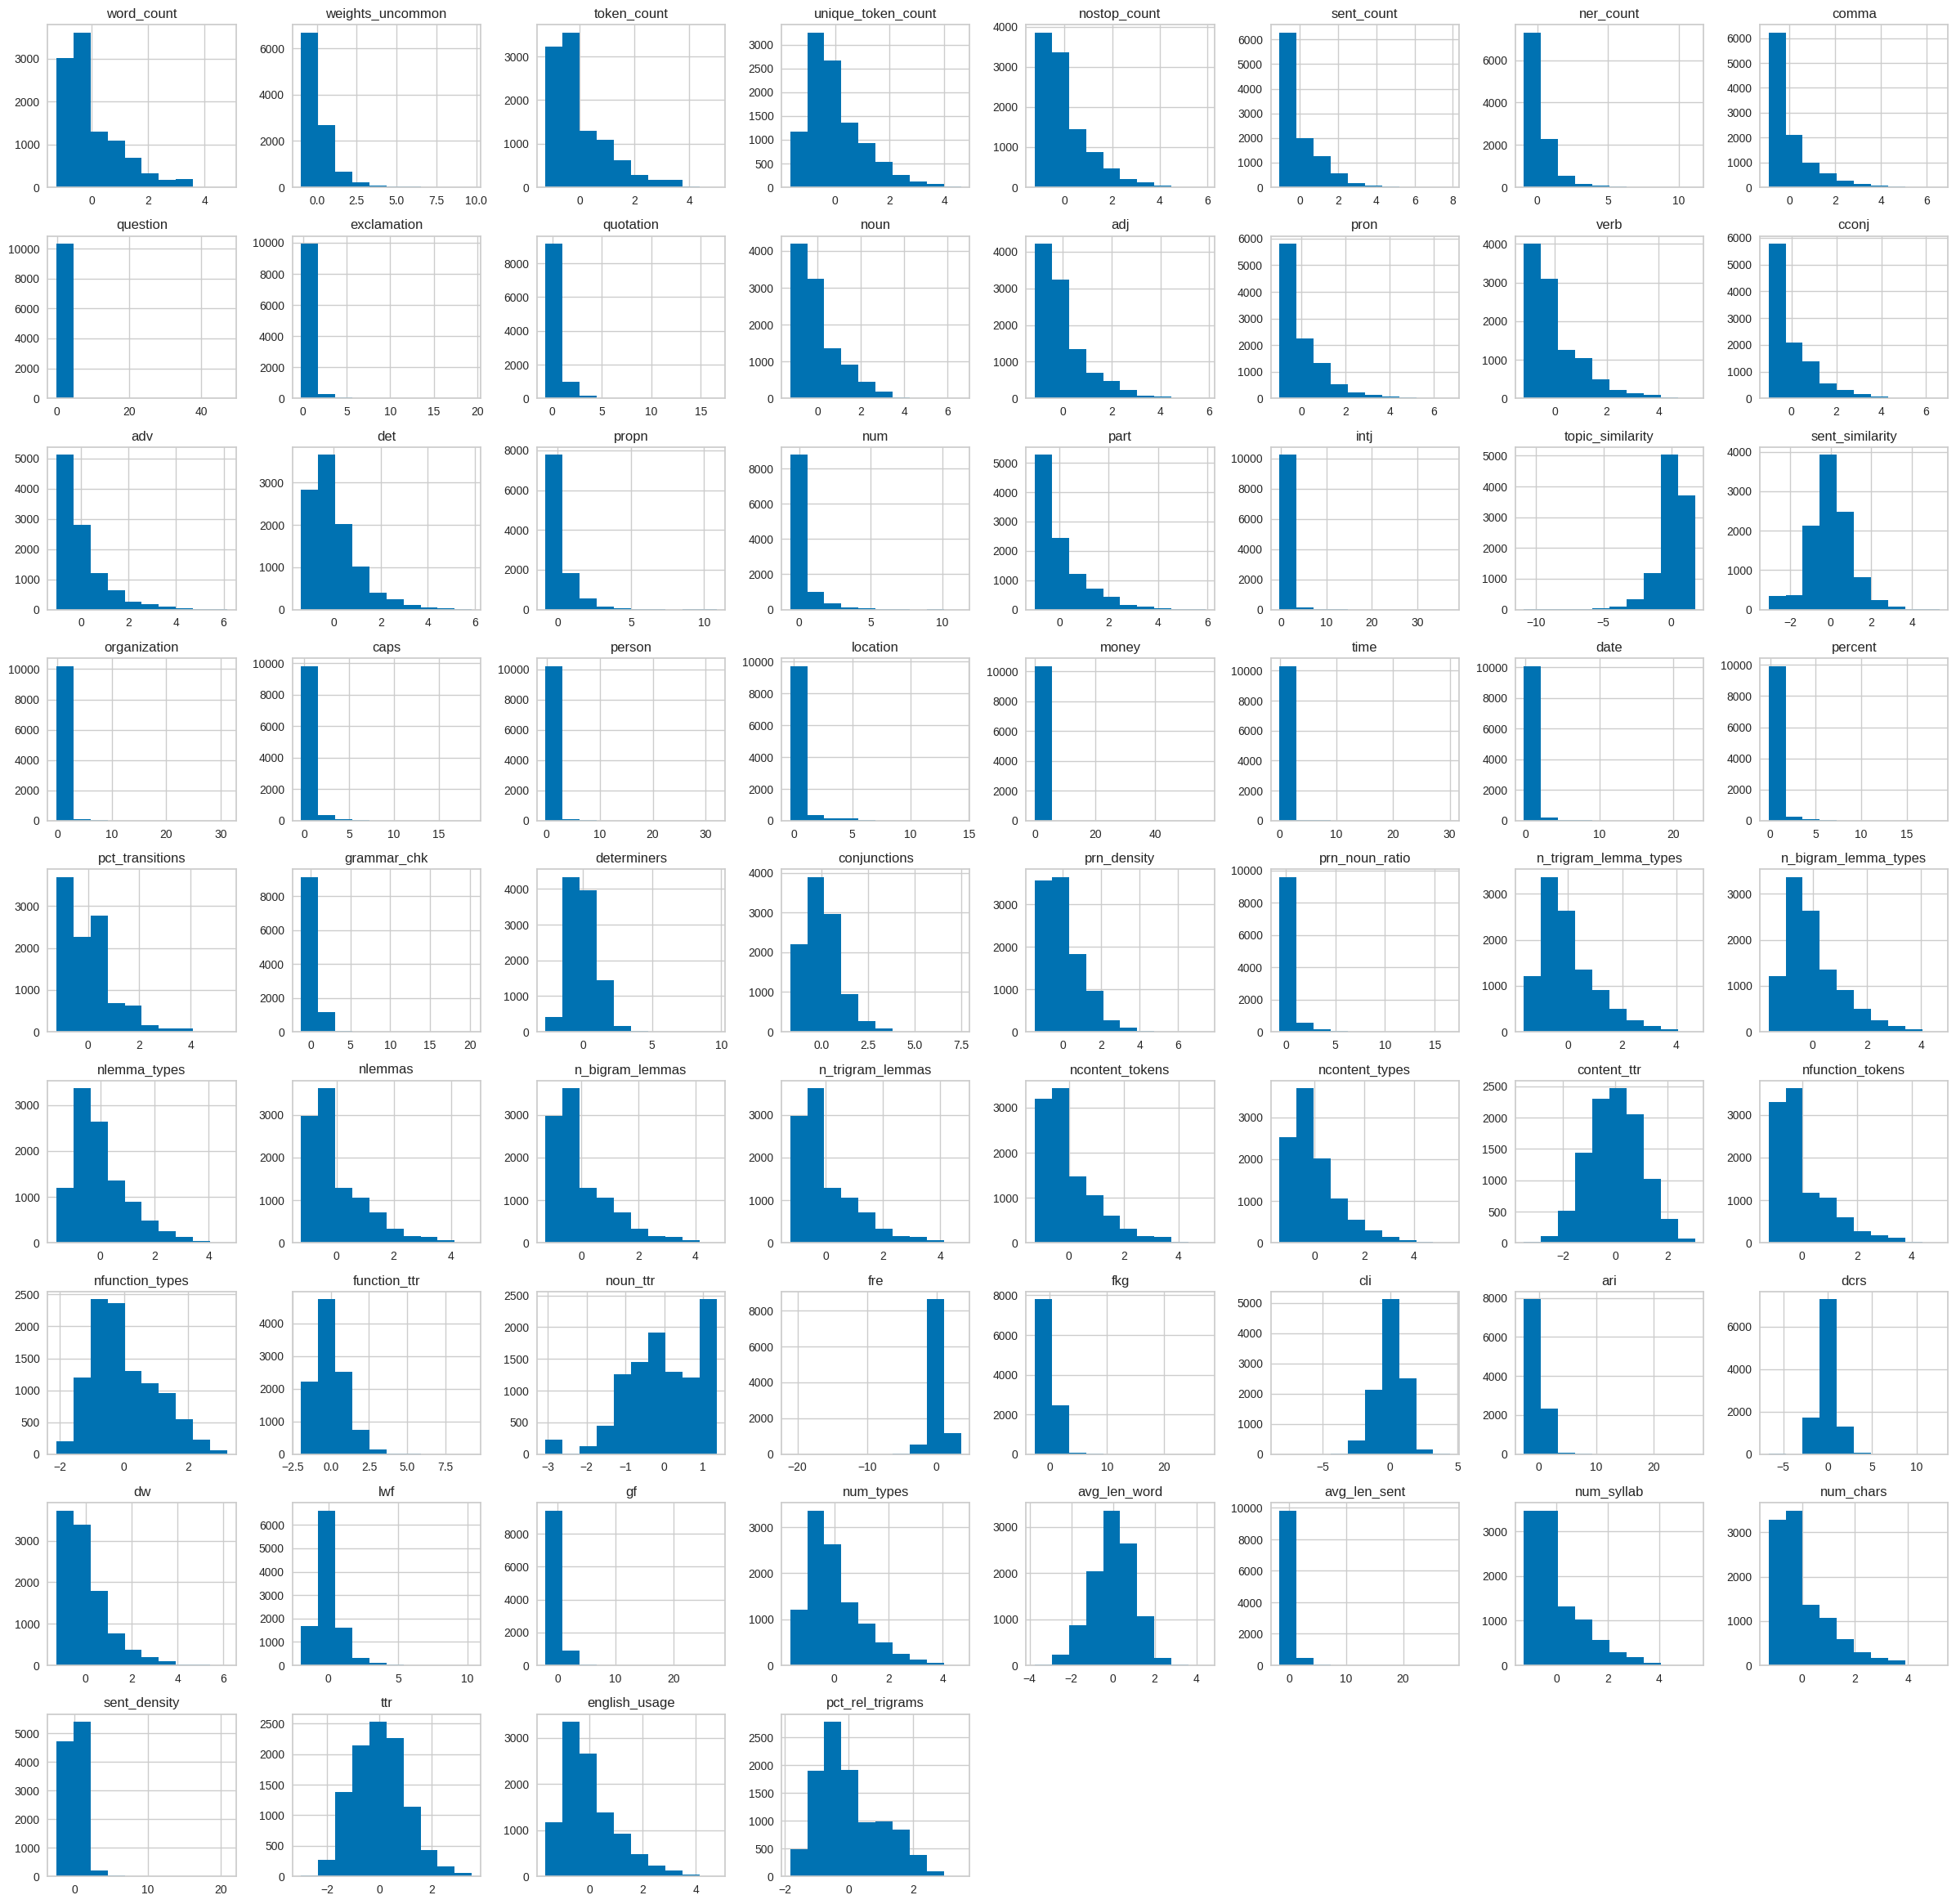

In [ ]:
X_train_scaled =  pd.DataFrame(X_train_scaled,columns=df_all_features,index=X_train.index)

In [ ]:
X_test_scaled = stdscaler.transform(X_test)
X_test_scaled.shape

(2596, 46)

In [ ]:
X_test_scaled=  pd.DataFrame(X_test_scaled,columns=df_all_features,index=X_test.index)

In [ ]:
pca = PCA(n_components = 36)
X_train_scaled = pca.fit_transform(X_train_scaled)

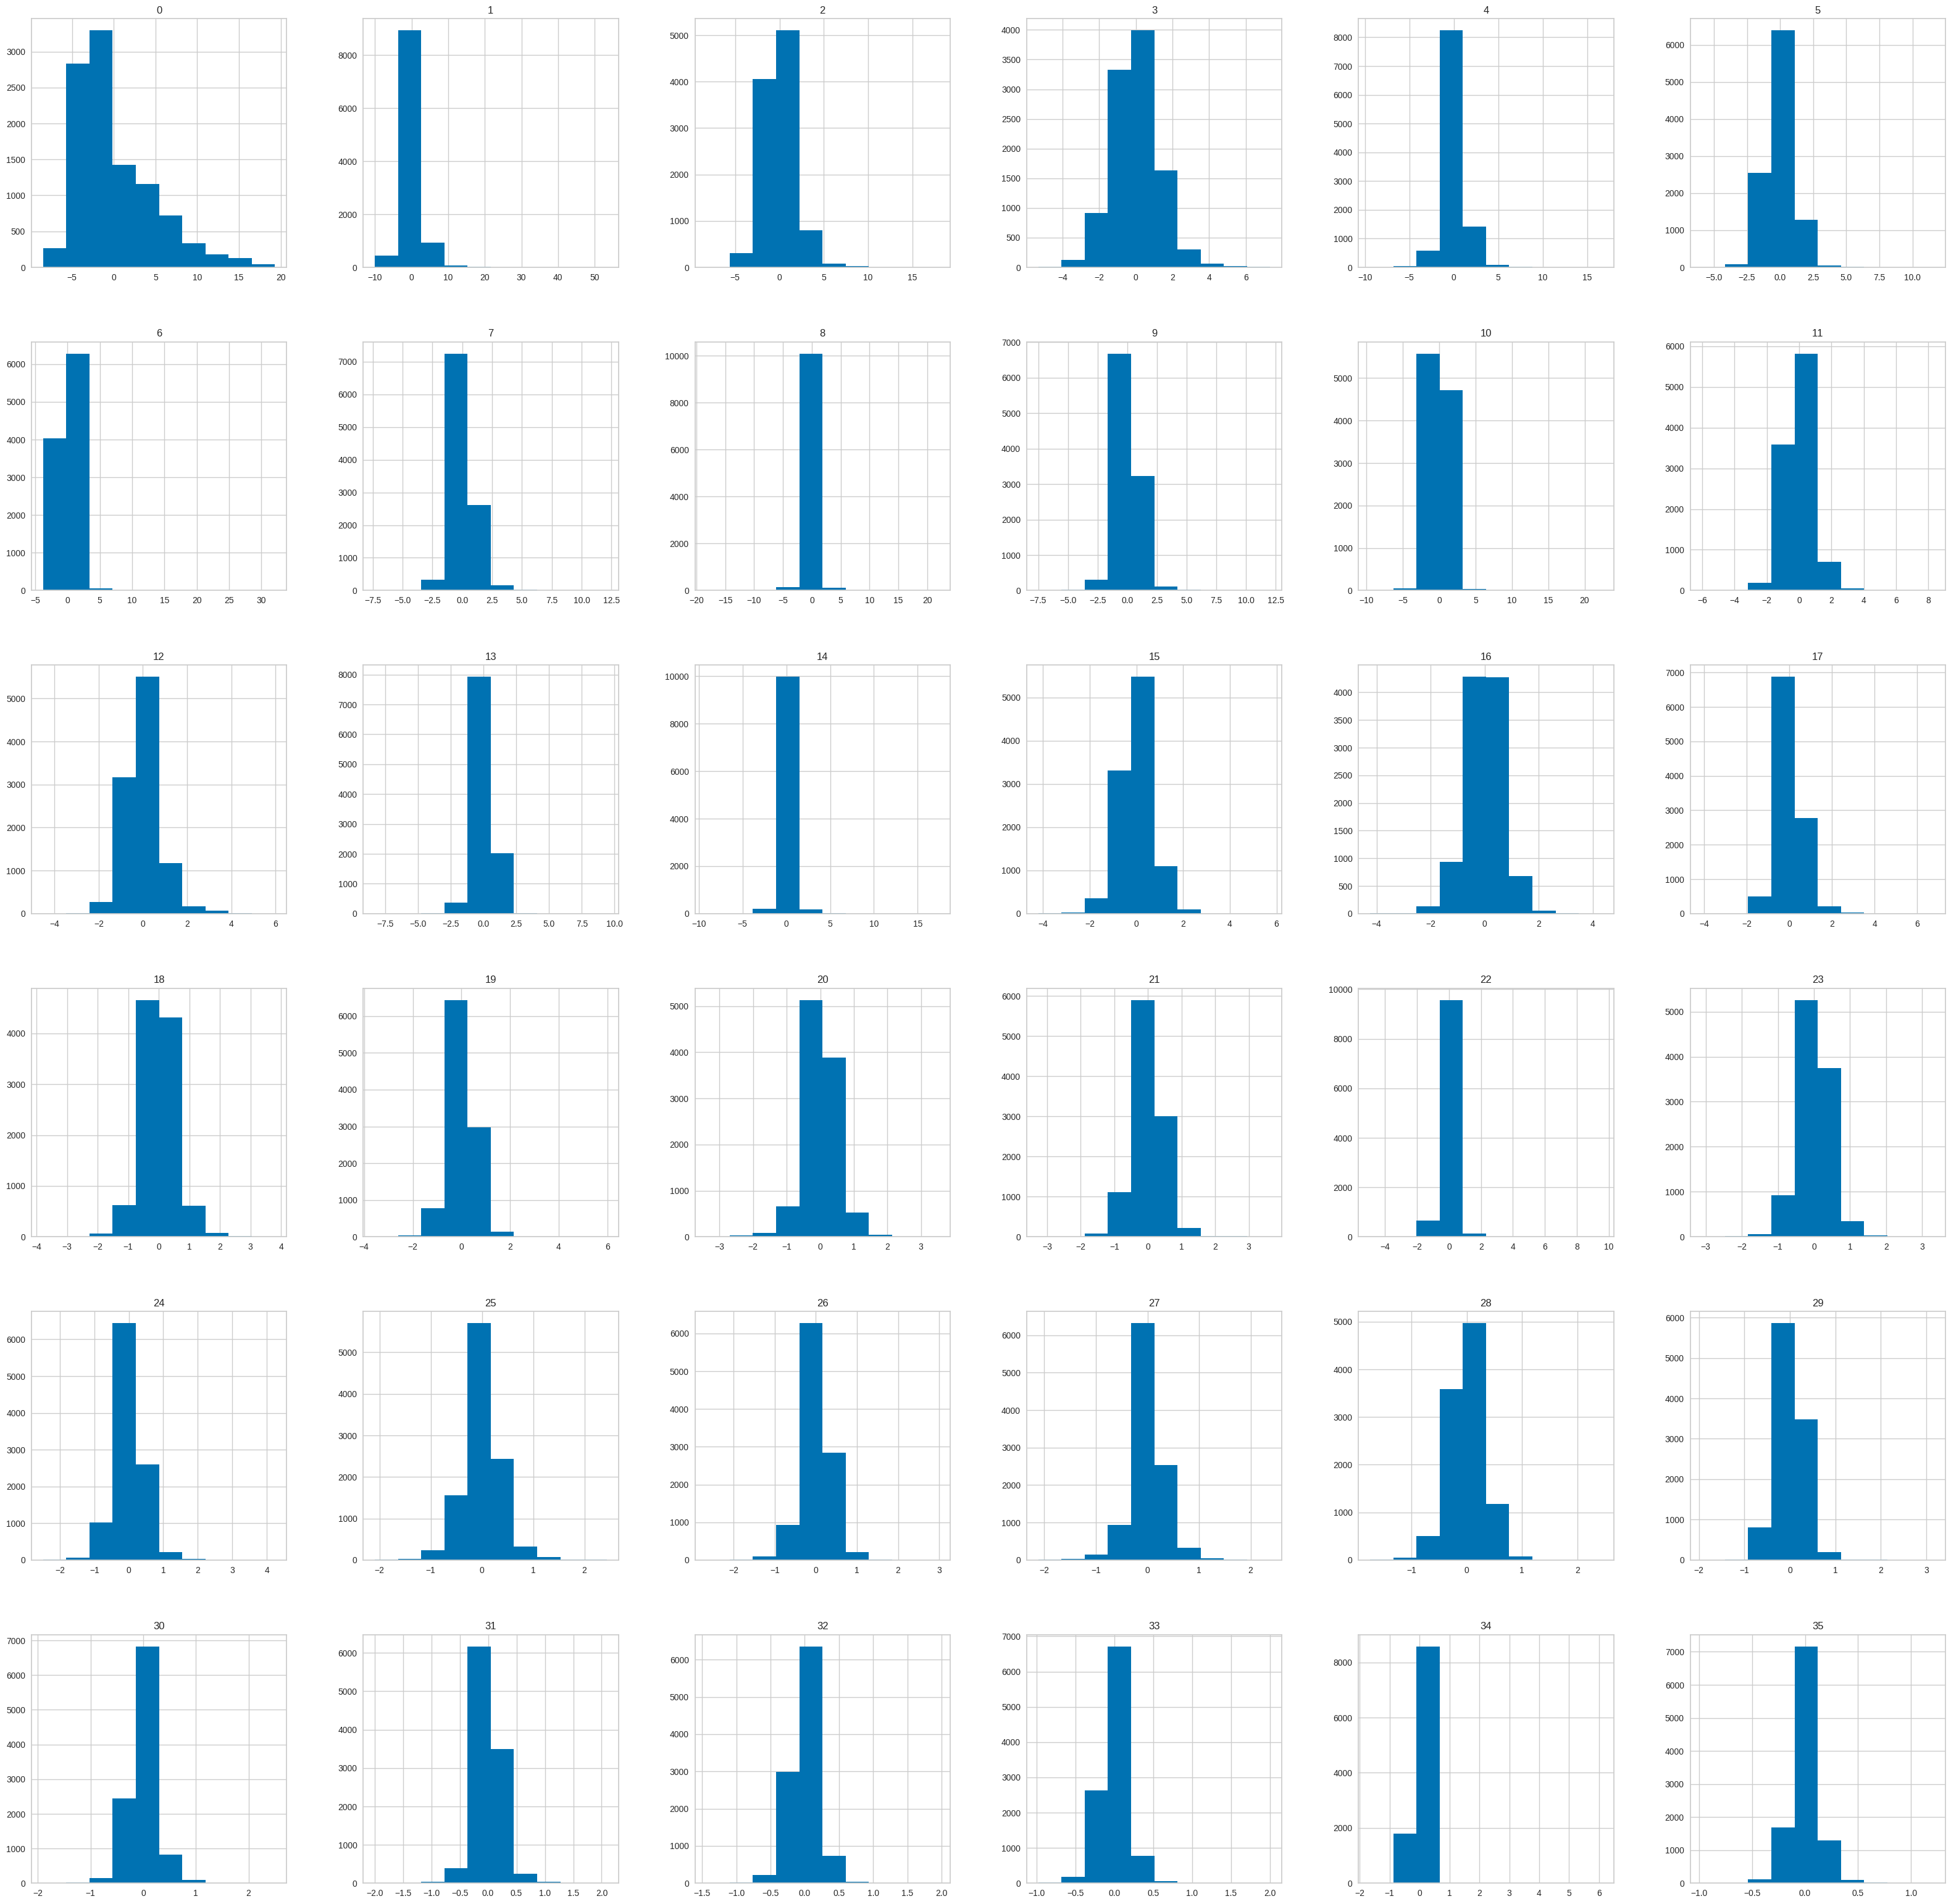

In [ ]:
X_test_scaled = pca.transform(X_test_scaled)

In [ ]:
svr=SVR(kernel='rbf',C= 100, epsilon =0.6, gamma =0.004)

In [ ]:
svr.fit(X_train_scaled, y_train)
y_pred=svr.predict(X_test_scaled)
print(evaluate_model(svr,X_train_scaled ,X_test_scaled ,y_train ,y_test)[0])

----------
Train MAE : 1.0692904173835647 ,Train MSE : 2.053219010807499 ,Train RMSE : 1.4329057927189417,Train R2 : 0.6253820297563933
Test MAE : 1.1348751096694925 ,Test MSE : 2.294724616572858 , Test RMSE : 1.514834847953023, Test R2: 0.5833073155832282
----------


In [ ]:
kappas = []
weights = []
from skll.metrics import kappa
kappas.append(evaluate(y_test, y_pred))
weights.append(len(training_set))
mqwk = mean_quadratic_weighted_kappa(kappas,weights=weights)
print('Weighted by topic Kappa score: {:.4f}'.format(mqwk))
print('')

Weighted by topic Kappa score: 0.7304



In [ ]:
# for use in pipeline
models = [
            [('scaler', StandardScaler()),('pca',PCA(n_components=36)),('SVR',SVR(kernel='rbf',C= 100, epsilon =0.6, gamma =0.004))]
        ]

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(Pipeline(models[0]), X, y,scoring='r2', cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.58


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(Pipeline(models[0]), X, y,scoring='neg_root_mean_squared_error', cv=kfold )
kf_cv_scores= -kf_cv_scores
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 1.53


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(Pipeline(models[0]), X, y,scoring='neg_mean_absolute_error', cv=kfold )
kf_cv_scores= -kf_cv_scores
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 1.15


In [ ]:
i=0
for model in models:
  piplne = Pipeline(model)
  print(piplne)
  # evaluate model
  cv = KFold(n_splits=5, shuffle=True, random_state=1)
  train_size, train_score, valid_score = learning_curve(estimator=piplne,X=X, y=y, cv=cv,train_sizes=np.linspace(0.1, 1, 30),scoring = 'neg_mean_absolute_error',random_state=42)
  train_scores_mean = -train_score.mean(axis = 1)
  validation_scores_mean = -valid_score.mean(axis =1)
  print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_size))
  print('\n', '-' * 20) 
  print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_size))

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=36)),
                ('SVR', SVR(C=100, epsilon=0.6, gamma=0.004))])
Mean training scores

 1038     0.490710
1360     0.500966
1682     0.564575
2004     0.600579
2326     0.629097
2648     0.640901
2970     0.684197
3292     0.784171
3615     0.855577
3937     0.908832
4259     0.957195
4581     0.999529
4903     1.036585
5225     1.068480
5547     1.092349
5870     1.103682
6192     1.103057
6514     1.103088
6836     1.098361
7158     1.096758
7480     1.100253
7802     1.104441
8125     1.111037
8447     1.114089
8769     1.108278
9091     1.098656
9413     1.086613
9735     1.073052
10057    1.069016
10380    1.061951
dtype: float64

 --------------------

Mean validation scores

 1038     2.050351
1360     1.970225
1682     2.275193
2004     2.356561
2326     2.345932
2648     2.279304
2970     1.715180
3292     1.495478
3615     1.432881
3937     1.393254
4259     1.347182
4581     1.332801
4903     1.32184

(0.0, 3.0)

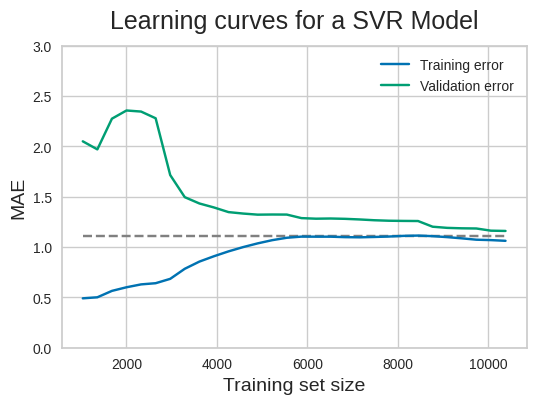

In [ ]:
plt.plot(train_size, train_scores_mean, label = 'Training error')
plt.plot(train_size, validation_scores_mean, label = 'Validation error')
plt.ylabel('MAE', fontsize = 14)
plt.hlines(np.mean([train_scores_mean[-1], validation_scores_mean[-1]]), train_size[0],train_size[-1],color='gray', linestyle='dashed')
plt.xlabel('Training set size', fontsize = 14)
title = 'Learning curves for a SVR Model'
plt.title(title, fontsize = 18, y = 1.03)
plt.legend(loc='best')
plt.ylim(0,3)

In [ ]:
i=0
for model in models:
  piplne = Pipeline(model)
  print(piplne)
  # evaluate model
  cv = KFold(n_splits=5, shuffle=True, random_state=1)
  train_size, train_score, valid_score = learning_curve(estimator=piplne,X=X, y=y, cv=cv,train_sizes=np.linspace(0.1, 1, 30),scoring = 'neg_root_mean_squared_error',random_state=42)
  train_scores_mean = -train_score.mean(axis = 1)
  validation_scores_mean = -valid_score.mean(axis =1)
  print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_size))
  print('\n', '-' * 20) 
  print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_size))

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=36)),
                ('SVR', SVR(C=100, epsilon=0.6, gamma=0.004))])
Mean training scores

 1038     0.586161
1360     0.603362
1682     0.694916
2004     0.751489
2326     0.790088
2648     0.804222
2970     0.885493
3292     1.052805
3615     1.165479
3937     1.240352
4259     1.310092
4581     1.367832
4903     1.415264
5225     1.458315
5547     1.490184
5870     1.497965
6192     1.493450
6514     1.488965
6836     1.478717
7158     1.472707
7480     1.477929
7802     1.479930
8125     1.485251
8447     1.488206
8769     1.481033
9091     1.469021
9413     1.455480
9735     1.440526
10057    1.435726
10380    1.428054
dtype: float64

 --------------------

Mean validation scores

 1038     2.587104
1360     2.481160
1682     2.923491
2004     3.008354
2326     3.007705
2648     2.918843
2970     2.216145
3292     1.944902
3615     1.872508
3937     1.820908
4259     1.760371
4581     1.734020
4903     1.71809

(0.0, 3.5)

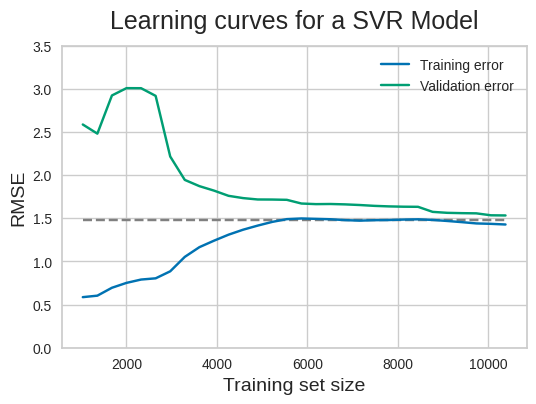

In [ ]:
plt.plot(train_size, train_scores_mean, label = 'Training error')
plt.plot(train_size, validation_scores_mean, label = 'Validation error')
plt.hlines(np.mean([train_scores_mean[-1], validation_scores_mean[-1]]), train_size[0],train_size[-1],color='gray', linestyle='dashed')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
title = 'Learning curves for a SVR Model'
plt.title(title, fontsize = 18, y = 1.03)
plt.legend(loc='best')
plt.ylim(0,3.5)

In [ ]:
for model in models:
  piplne = Pipeline(model)
  print(piplne)
  cv = KFold(n_splits=5, shuffle=True, random_state=1)
  train_size, train_score, valid_score = learning_curve(estimator=piplne,X=X, y=y, cv=cv,train_sizes=np.linspace(0.1, 1, 30),scoring ='r2',random_state=42)
  train_scores_mean = train_score.mean(axis =1)
  validation_scores_mean = valid_score.mean(axis =1)
  print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_size))
  print('\n', '-' * 20) 
  print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_size))

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=36)),
                ('SVR', SVR(C=100, epsilon=0.6, gamma=0.004))])
Mean training scores

 1038     0.857276
1360     0.845358
1682     0.827213
2004     0.812088
2326     0.795298
2648     0.790695
2970     0.756867
3292     0.697958
3615     0.660452
3937     0.641245
4259     0.623771
4581     0.622327
4903     0.626506
5225     0.621579
5547     0.628206
5870     0.629711
6192     0.633138
6514     0.634495
6836     0.640427
7158     0.642376
7480     0.641677
7802     0.642856
8125     0.642957
8447     0.642211
8769     0.642121
9091     0.640780
9413     0.640296
9735     0.640433
10057    0.633794
10380    0.628308
dtype: float64

 --------------------

Mean validation scores

 1038    -0.223301
1360    -0.123483
1682    -0.558594
2004    -0.650920
2326    -0.649409
2648    -0.554051
2970     0.102331
3292     0.310161
3615     0.360695
3937     0.395441
4259     0.434913
4581     0.451636
4903     0.46172

(-0.7, 1.0)

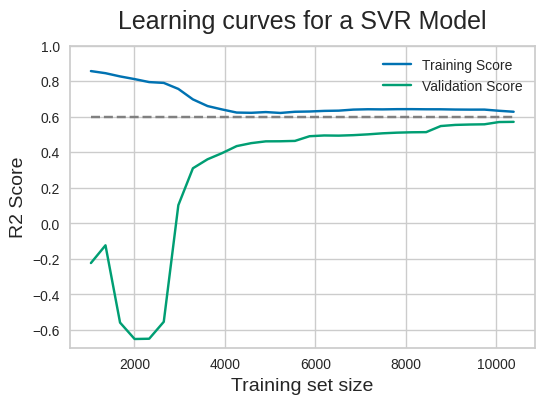

In [ ]:
plt.plot(train_size, train_scores_mean, label = 'Training Score')
plt.plot(train_size, validation_scores_mean, label = 'Validation Score')
plt.hlines(np.mean([train_score[-1], valid_score[-1]]), train_size[0],train_size[-1],color='gray', linestyle='dashed')
plt.ylabel('R2 Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
title = 'Learning curves for a SVR Model'
plt.title(title, fontsize = 18, y = 1.03)
plt.legend(loc='best')
plt.ylim(-0.7,1)

In [ ]:
from joblib import dump, load
dump(svr, 'svr_pca.joblib')

['svr_pca.joblib']

In [ ]:
dump(pca, 'pca_model.joblib')

['pca_model.joblib']

In [ ]:
sc=load('svr_pca.joblib')